In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/my_keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 30

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
print(X_dataset.size)

88872


In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
print(y_dataset.size)

2116


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [9]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21 * 2, )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

# customized model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])


In [10]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 64)                2752      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 30)                990       
                                                                 
Total params: 5822 (22.74 KB)
Trainable params: 5822 (22

In [11]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [12]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [13]:
model.fit(
    X_train,
    y_train,
    epochs=2000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/2000


12/13 [==========================>...] - ETA: 0s - loss: 3.4197 - accuracy: 0.0417 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.keras
13/13 [==============================] - 2s 37ms/step - loss: 3.4195 - accuracy: 0.0422 - val_loss: 3.3675 - val_accuracy: 0.0302
Epoch 2/2000
 1/13 [=>............................] - ETA: 0s - loss: 3.3352 - accuracy: 0.0938
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.keras
13/13 [==============================] - 0s 8ms/step - loss: 3.3465 - accuracy: 0.0725 - val_loss: 3.3191 - val_accuracy: 0.0756
Epoch 3/2000
 1/13 [=>............................] - ETA: 0s - loss: 3.2906 - accuracy: 0.1172
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.keras
13/13 [==============================] - 0s 9ms/step - loss: 3.3121 - accuracy: 0.0762 - val_loss: 3.2693 - val_accuracy: 0.0870
Epoch 4/2000
 8/13 [=================>............] - ETA: 0s - loss: 3.2874 - accuracy: 0

In [14]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

5/5 [==============================] - 0s 2ms/step - loss: 0.2209 - accuracy: 0.9622


In [15]:
model.save(model_save_path)

In [16]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [17]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 113ms/step
[1.20043310e-07 1.10823706e-01 6.82478549e-06 1.44343619e-04
 5.39128901e-03 2.85071624e-03 8.84509355e-10 1.03138236e-08
 3.09349218e-07 7.03720460e-08 3.94851124e-10 1.67919223e-09
 2.41216714e-03 2.35293669e-06 2.69248965e-04 4.49054749e-09
 2.38761153e-08 6.24626455e-06 2.01763178e-04 8.43944636e-11
 6.02637920e-06 1.43376838e-05 8.76017809e-01 2.24718974e-07
 3.77308407e-09 3.14778260e-13 5.94186713e-06 6.27595227e-06
 1.78578717e-03 5.45090297e-05]
22


# Confusion matrix

17/17 [==============================] - 0s 2ms/step


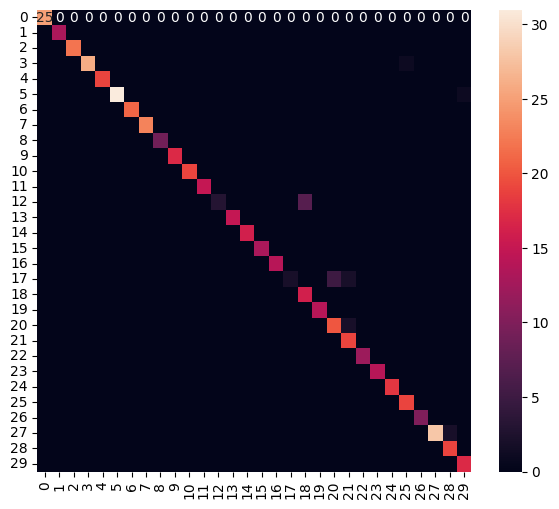

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        22
           3       1.00      0.96      0.98        27
           4       1.00      1.00      1.00        19
           5       1.00      0.97      0.98        32
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00        15
          12       1.00      0.30      0.46        10
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00        16
          15       1.00      1.00      1.00        13
          16       1.00      1.00      1.00        14
     

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [19]:
# Save as a model dedicated to inference
model.save(model_save_path)

In [20]:
# Transform model (quantization)

# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tflite_quantized_model = converter.convert()

# open(tflite_save_path, 'wb').write(tflite_quantized_model)

In [21]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [22]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [23]:
tflite_quantized_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\subuc\AppData\Local\Temp\tmpyw7x_la_\assets


INFO:tensorflow:Assets written to: C:\Users\subuc\AppData\Local\Temp\tmpyw7x_la_\assets


In [24]:
open(tflite_save_path, 'wb').write(tflite_quantized_model)

11296

# Inference test

In [25]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [26]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [27]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [28]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2.99 ms


In [29]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.00703112e-07 1.08023435e-01 6.90819343e-06 1.19703778e-04
 4.82518505e-03 2.89588002e-03 8.05524925e-10 1.00473603e-08
 2.51661163e-07 6.50082725e-08 2.91951657e-10 1.34760125e-09
 1.97184621e-03 1.63629863e-06 2.48072203e-04 4.57677185e-09
 2.32312427e-08 4.53007215e-06 1.53511224e-04 5.50921149e-11
 4.61985155e-06 1.19782399e-05 8.79826784e-01 1.72730921e-07
 3.27364269e-09 2.18622551e-13 5.55760516e-06 5.84556074e-06
 1.83511840e-03 5.87083814e-05]
22
